<a href="https://colab.research.google.com/github/LimGuenTaek/pymldg-rev/blob/main/03_%ED%8F%89%EA%B0%80/3_1_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 평가

* 머신러닝은 데이터 가공/변환 , 모델 학습/예측, 그리고 평가(Evaluation)의 프로세스로 구성됩니다.

* 앞장에서는 주로 정확도(Accuracy)를 사용했지만 , 머신러닝 모델은 여러 가지 방법으로 예측 성능을 평가할 수 있습니다.

* 성능 평가 지표(Evaluation Metric)은 일반적으로 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉩니다.

* 회귀의 경우 대부분 실제값과 예측값의 오차 평균값에 기반하고 실제로 회귀를 위한 평가는 그렇게 복잡하지 않으므로 5장의 회귀 장에서 다시 상세하게 설명합니다.

* **분류의 평가방법도 일반적으로는 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만 , 단순히 이러한 정확도만 가지고 판단했다가는 잘못된 평가 결과에 빠질 수 있습니다.**

* 먼저 분류의 성능 평가 지표부터 살펴보겠습니다.

  * 정확도(Accuracy)
  * 오차행렬(Confusion matrix)
  * 정밀도(Precision)
  * 재현율(Recall)
  * F1 스코어
  * ROC AUC


* 분류는 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결괏값만을 가지는 이진 분류와 여러 개의 결정 클래스 값을 가지는 멀티 분류로 나뉠 수 있습니다.


## 정확도(Accuracy)

* 정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표입니다.

  $Accuracy=\frac{TruePositive+TrueNegative}{TP+TN+FP+FN}$

* 하지만 정확도 지표는 어떤경우에는 좋지 못한 평가지표가 되는데 불균형한(imbalanced) 레이블 값 분포에서 ML 모델의 성능을 판단할 경우 , 적합한 평가 지표가 아닙니다.

* 예를 들어 100개의 데이터가 있고 이 중에 90개의 데이터 레이블이 0 , 단 10개의 데이터 레이블이 1이라고 한다면 무조건 0으로 예측 결과를 반환하는 ML 모델의 경우라도 정확도가 90%가 됩니다.

* 따라서 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안 됩니다.

## 오차 행렬(Confusion Matrix)

* 이진 분류에서 성능 지표로 잘 활용되는 오차행렬(confusion matrix)은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused)있는지도 함께 보여주는 지표입니다. 즉 , 이진 분류의 예측 오류가 얼마인지와 더불어 **어떠한 유형의 예측 오류**가 발생하고 있는지를 함께 나타내는 지표입니다.

  * True Negative : 예측 값을 Negative(0)으로 예측했고 , 실제 값 역시 Negative(0)
  * True Positive : 예측 값을 Positive(1)으로 예측했고 , 실제 값 역시 Positive(1)
  * False Positive : 예측 값을 Positive(1)으로 예측했지만 , 실제 값이 Negative(0)
  * False Negative : 예측 값을 Negative(0)으로 예측했지만 , 실제 값이 Positive(1)




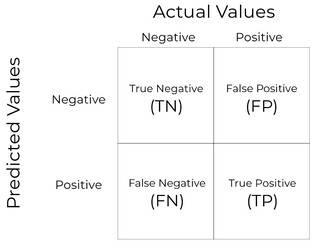

* 사이킷런은 오차 행렬을 구하기 위해 **confusion_matrix()** API를 제공합니다.

## 정밀도와 재현율(Precision and Recall)

* 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표입니다.

  - $Precision=\frac{True\  Positive}{False\  Positive\  +\  True\  Positive} $

  - $Recall=\frac{True\  Positive}{False\  Negative\  +\  True\  Positive} $

* 정밀도(Precision)은 예측을 Positive로 한 대상중에서 실제 값이 Positive로 일치한 데이터의 비율을 의미합니다.

* 재현율(Recall)은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 의미합니다.

  **정밀도와 재현율 지표 중에 이진 분류 모델의 업무 특성에 따라서 특정 평가 지표가 더 중요한 지표로 간주될 수 있습니다.**

  1. 재현율(Recall)이 더 중요한 업무는 실제 Positive인데 Negative로 분류하면 안되는 task입니다.
  2. 정밀도(Precision)이 더 중요한 업무는 실제 Negative인데 Positive로 분류하면 안되는 경우


* 공식을 보면 알 수 있듯이 Precision과 Recall 모두 True Positive를 높이는 것은 동일하지만

* Recall은 False Negative를 낮추는 것이 목표(실제로 Positive인데 Negative라 예측)

* Precision은 False Positive를 낮추는 것이 목표(실제로 Negative인데 Positive라 예측하는 경우)

* 사이킷런 정밀도 계산을 위해 **precision_score()**를 , 재현율 계산을 위해 **recall_score**() API를 제공합니다.

## F1 스코어

* F1 스코어(score)는 정밀도와 재현율을 결합한 지표입니다.

* F1 스코어(score)는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가집니다.

  $F1=\frac{2}{\frac{1}{recall} +\frac{1}{precision} } =2\times \frac{precision\times recall}{precision+recall} $

* 만약 A 예측 모델의 경우 정밀도가 0.9 , 재현율이 0.1로 극단적인 차이가 나고 , B예측 모델은 정밀도가 0.5 , 재현율이 0.5로 정밀도와 재현율이 큰 차이가 없다면 A의 F1 score는 0.18 B의 F1 score는 0.5로 B가 A에 비해 우수한 F1 스코어를 가집니다.

* 사이킷런은 F1 스코어를 구하기 위해 **f1_score()**라는 API를 제공합니다.

## ROC 곡선과 AUC

* ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 지표입니다.

* ROC 곡선(Receiver Operation Charateristic Curve)은 우리말로 수신자 판단 곡선으로 불립니다.

* 일반적으로 의학 분야에서 많이 사용되지만 머신러닝의 이진 분류 모델의 예측 성능을 판단하는 중요한 평가 지표이기도 합니다.

* ROC 곡선은 FPR(False Positive Rate)가 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선입니다.

  * TPR은 실제 값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타냄
  * TNR은 실제 값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타냄

* TNR(True Negative Rate)인 특이성은 다음과 같이 구할 수 있습니다.

  $TNR=\frac{TN}{FP+TN} $

  $FPR(False\  Positive\  Rate)\  =\  \frac{FP}{FP+TN} $

  $FPR=1-TNR$



* 다음은 ROC 곡선의 예입니다.

* 가운데 직선은 ROC 곡선의 최저 값입니다.

* 왼쪽 하단과 오른쪽 상단을 대각선으로 이은 직선은 동전을 무작위로 던져 앞/뒤를 맞추는 랜덤 수준의 이진 분류의 ROC 직선입니다.(AUC는 0.5)

* ROC 곡선이 가운데 직선에 가까울수록 성능이 떨어지는 것이며 , 멀어질수록 성능이 뛰어난 것입니다.

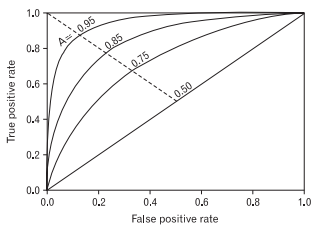

* 어떻게 False Positive rate를 0에서 1까지 변화시킬 수 있을 까요?

* 분류 결정 threshold를 변경하면 됩니다.

* 만약 threshold = 1 이라면 , Positive로 예측할 수 없기 때문에 FPR 역시 0이 되버립니다.

* 반대로 threshold = 0 이라면 , Negative로 예측하지 않기 때문에 FPR은 1이 되버립니다. (1-TNR)

* 이렇게 threshold를 1 부터 0까지 거꾸로 변화시키면서 FPR을 구하고 이 FPR 값의 변화에 따른 TPR 값을 구하는 것이 ROC 곡선입니다.

* 사이킷런은 ROC 곡선을 구하기 위해 **roc_curve()** API를 제공합니다.